Reid Miller, Henry Miller:

[Data Science Project](https://github.com/reidm340/reidm340.github.io)

#Internal Notes

To-Do 3/10:

*   Coach dataset https://www.kaggle.com/datasets/jacobbaruch/nba-head-coaches
*   Fantasy point column
*   Make new standardized DataFrame
*   Groupby functions, by season, by season and team

To-Do list in order
 - [ ] How many players play in total in fantasy basketball per leauge and amount of players per team.
 - [ ] compare total number trends between seasons
 - [ ] scale the data (by season)
 - [ ] Find "star players"
 - [ ] run at least 5 ai fun stuff on our data
 - [ ] what postions are the best for fantasy (in the flex spot)
 - [ ] describe how players are on each fantasy roster
 - [ ] given a player changes team how do we expect them to do in the following season
 - [ ] we can do all of these for AFP and FP
 - [ ] predict 22-23 stats and see variation for over and under representation
 - [ ] look at rookie averages (played at least 40 games to qualify)
 - [ ] rank them by postion and run everything again isolating for postion





To-do list for milestone

# Introduction

Writeup:

For our project, our group (Henry Miller and Reid Miller) will be attempting to predict the best choices for fantasy basketball leagues. The main dataset we will be using is “NBA_Player_Stats_2.csv,” which we extracted from the website Kaggle. It contains data on every NBA player from the 1996-97 season through the 2021-22 season, along with the following information: Player (player's name), Pos (position), Age (player's age), G (games played), GS (games started), MP (minutes played), FG (field goals made), FGA (field goals attempted), FG% (field goal percentage), 3P (3-pointers made), 3PA (3-pointers attempted), 3P% (3-point percentage), 2P (2-pointers made), 2PA (2-pointers attempted), 2P% (2-point percentage), eFG% (effective field goal percentage), FT (free throws made), FTA (free throws attempted), FT% (free throw percentage), ORB (offensive rebounds), DRB (defensive rebounds), TRB (total rebounds), AST (assists), STL (steals), BLK (blocks), TOV (turnovers), PF (personal fouls), PTS (points), Season (season these stats are for), and MVP (boolean value which is 1 when the player wins MVP). All stats are measured on a per-game average.

This dataset will be extremely useful because it contains all the stats that are used in fantasy basketball scoring for such a large sample of players and seasons. While there are a variety of scoring systems used in different fantasy basketball leagues (Rotisserie, Season Points, Head-to-Head: Points, Head-to-Head: Each Category), they are all based on the information above in some form. This means that we will be able to accurately recreate any individual’s fantasy output from any of these seasons, and that we will able to analyze the stats that directly affect fantasy success.

Collaboration Plan:

We have met to organize our collaboration plan, and we have decided that we will meet weekly on Sundays at 2:00 PM. During these meetings, we will touch base about our progress over the previous week and plan out goals for the coming week. We plan to use Google Colab to work on this project. We understand that two people working on the same Colab project at the same time can cause information to be overwritten, so we have decided to add any new work on a personal copy of our project before copying and pasting it over to the main one. We also plan to inform the other group-member whenever we plan to update the main project file. This ensures that we do not encounter problems with overwriting while working on this project, but are still able to make progress without any impediment.


For this project, we unitlized Python 3, pandas, maplotlib, and more. Our first code cell will be importing the necessary libraries.

In [ ]:
!git clone https://github.com/reidm340/reidm340.github.io
%cd /content/reidm340.github.io/raw_data

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
from itertools import cycle
import seaborn as sns

Cloning into 'reidm340.github.io'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 37 (delta 11), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (37/37), 1.29 MiB | 5.01 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/reidm340.github.io/raw_data


# Formating The Data

##Loading in the data set

This dataset was extracted from [Kaggle](https://www.kaggle.com/datasets/raunakpandey030/nba-player-stats/data). It contains all of the nba individual player stats from 1997-98 season through 2021-22 season.

To load this data, I utilized pandas' read_csv(). The head of the table (without any transformation or cleaning) is displayed below.

In [ ]:
nbaPStats = pd.read_csv('NBA_Player_Stats_2.csv')

In [ ]:
nbaPStats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False


As you see here, I used this data set because I had already observed that the data was tidy and well orginized

With this data we wondering what the biggest factors are when it comes to fantasy basketball. The question we are asking is what stats from the previous season will result in a undervalued fantasy basketball draft pick in the following season?

###Requirment for milestone 1

Here's one Interesting Stat:

In [ ]:
Lebron_Teams = nbaPStats[nbaPStats['Player'] == 'LeBron James']['Tm'].value_counts()
Lebron_Teams

Tm
CLE    11
MIA     4
LAL     4
Name: count, dtype: int64

LeBron James has played at least one games for the Cavs in 11 different seasons!!!

Here's a graph that represent how many seasons LeBron has played at least one game for a team, and how many times hes done it for that team:

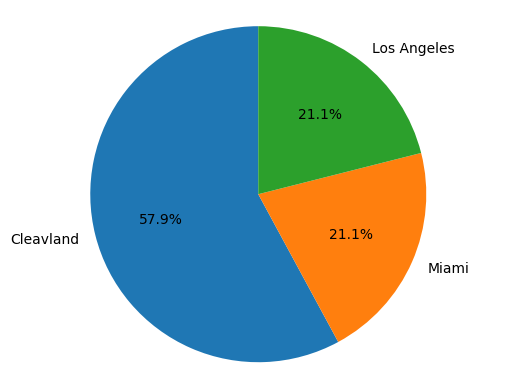

In [ ]:
labels = Lebron_Teams.index.to_list()
sizes = Lebron_Teams.to_list()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=['Cleavland','Miami','Los Angeles'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

## Tidying the data

###dtype check

Making sure the dtype of each column is what we want

In [ ]:
nbaPStats.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Season     object
MVP          bool
dtype: object

These are exactly what I want. In the future I might make what in the NBA is called advanced stats which use ratios of some of the float objects that may be more indicitive of player sucsess. An example of this would be true shooting precentage.

###Cleaning NaN values

Now let's check if there are any NaN values


In [ ]:
nan_rows = nbaPStats.isna().any(axis=1)
nan_rows.value_counts()

False    11962
True      2611
Name: count, dtype: int64

Uh oh. Let's see if I can do anything about that. After some analaysis I found out that all the NaN values exist in the precentage columns when there were no attempts from the player. Therefiore since they did not take any 3 point shots for example, we can say that their 3 point presentage is 0%. Therefore I am going to relace all NaN values with 0

In [ ]:
nbaPStats = nbaPStats.fillna(0)

Now lets check to see if that worked

In [ ]:
nan_rows = nbaPStats.isna().any(axis=1)
nan_rows.value_counts()

False    14573
Name: count, dtype: int64

Now we have no NaN values!!!

###Getting rid of unuseful data

Now to remove the irrelevant 'Rk' column.

In [ ]:
nbaPStats.pop('Rk')
nbaPStats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False


No more 'Rk' values, so this was successful!

###Adding useful data columns

I talked about this ealier but I am now going to add a column for true shooting percentage, which combines all types of scoring to aproximate how effecient of a shooter a certain player is. This is a standardized calculation. Throughout this project we hope top come up with some of out own advanced nba stats that would be useful.

In [ ]:
nbaPStats['TS%'] = (nbaPStats['PTS']/2) / (nbaPStats['FGA'] + (nbaPStats['FTA'] * 0.475))
nbaPStats['TS%']

0        0.403873
1        0.450863
2        0.554588
3        0.539461
4        0.514286
           ...   
14568    0.527197
14569    0.597455
14570    0.538344
14571    0.625752
14572    0.649842
Name: TS%, Length: 14573, dtype: float64

Now we have true shooting precentage in our dataframe!!!

Because our project is based on fantasy basketball, the goal of our project is to maximize fantasy points. To do that we need to make a new column that stores how many fantasy points each player gets on a normal season for them. We will also calculate how many fantasy points each player on average per game. The distinction betweenthe two are important. The star players in the nba tend to do something called "load management" which is another word for rest to prevent injuries. Therefore star players occasonally will score more points on average for the games they play but will have less total fantasy points in a season compared to non-star players.

For our project we will be using the [ESPN default fantasy points](https://www.espn.com/fantasy/basketball/story/_/id/30296896/espn-fantasy-default-points-league-scoring-explained) which is as follows;

Point = 1

3PM = 1

FGA = -1

FG = 2

FTA = -1

FT = 1

TRB = 1

AST = 2

STL = 4

BLK = 4

(Reference the introduction to see what the abbriviations mean)

Now adding the fantasy points columns to our dataset:

(FP = fantasy points and FPA = fantasy points average)

In [ ]:
# calculating total fantasy points
nbaPStats['FP'] = (nbaPStats['PTS'] + nbaPStats['3P'] - nbaPStats['FGA'] + (2 * nbaPStats['FG']) - nbaPStats['FTA'] + nbaPStats['FT'] + nbaPStats['TRB'] + (2 * nbaPStats['AST']) + (4 * nbaPStats['STL']) + (4 * nbaPStats['BLK'])) * nbaPStats['G']

# calculating fantasy points average
nbaPStats['FPA'] = nbaPStats['PTS'] + nbaPStats['3P'] - nbaPStats['FGA'] + (2 * nbaPStats['FG']) - nbaPStats['FTA'] + nbaPStats['FT'] + nbaPStats['TRB'] + (2 * nbaPStats['AST']) + (4 * nbaPStats['STL']) + (4 * nbaPStats['BLK'])

nbaPStats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Season,MVP,TS%,FP,FPA
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,0.5,0.0,0.6,1.0,7.3,1997-98,False,0.403873,381.3,12.3
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,0.6,0.2,1.1,1.4,6.4,1997-98,False,0.450863,678.5,11.5
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,1.1,0.9,3.1,2.5,22.3,1997-98,False,0.554588,3345.6,40.8
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,1.2,0.2,1.9,1.6,8.1,1997-98,False,0.539461,1374.0,22.9
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,0.7,0.1,1.3,1.4,4.5,1997-98,False,0.514286,455.1,12.3


Since we are interested in looking at the relationship between these stats and their relationship with the player's fantasy performance for the next season, it makes sense to add two more columns, next_FP and next_FPA. These variables stand for the players fantasy points and fantasy point average in the following season. If this number is -1, it means the player did not play in the following season.

In [ ]:
def get_next_FP(row):
    player = row["Player"]
    season = row["Season"]

    # Get following season
    season_yr1 = int(season[:4])
    season_yr2 = int(season[-2:])
    next_season = (str(season_yr1 + 1) + "-0" + str(season_yr2 + 1)) if season_yr2 < 10 else (str(season_yr1 + 1) + "-" + str(season_yr2 + 1))

    # Find player's stats for the following season
    player_year = nbaPStats.loc[(nbaPStats["Player"] == player) & (nbaPStats["Season"] == next_season)]

    if player_year.empty:
        next_FP = -1
    else:
        # Calculate total fantasy points
        fantasy_stats = (player_year['PTS'] + player_year['3P'] - player_year['FGA'] + (2 * player_year['FG']) - player_year['FTA'] + player_year['FT'] + player_year['TRB'] + (2 * player_year['AST']) + (4 * player_year['STL']) + (4 * player_year['BLK']))

        # Calculate total and average fantasy points
        next_FP = (fantasy_stats * player_year["G"]).iloc[0]  # Extract the float value

    return next_FP

In [ ]:
def get_next_FPA(row):
    player = row["Player"]
    season = row["Season"]

    # Get following season
    season_yr1 = int(season[:4])
    season_yr2 = int(season[-2:])
    next_season = (str(season_yr1 + 1) + "-0" + str(season_yr2 + 1)) if season_yr2 < 10 else (str(season_yr1 + 1) + "-" + str(season_yr2 + 1))

    # Find player's stats for the following season
    player_year = nbaPStats.loc[(nbaPStats["Player"] == player) & (nbaPStats["Season"] == next_season)]

    if player_year.empty:
        next_FP = -1
    else:
        # Calculate total fantasy points
        fantasy_stats = (player_year['PTS'] + player_year['3P'] - player_year['FGA'] + (2 * player_year['FG']) - player_year['FTA'] + player_year['FT'] + player_year['TRB'] + (2 * player_year['AST']) + (4 * player_year['STL']) + (4 * player_year['BLK']))

        # Calculate total and average fantasy points
        next_FP = (fantasy_stats).iloc[0]  # Extract the float value

    return next_FP

In [ ]:
nbaPStats["next_FP"] = nbaPStats.apply(get_next_FP, axis=1)
nbaPStats["next_FPA"] = nbaPStats.apply(get_next_FPA, axis=1)

KeyboardInterrupt: 

In [ ]:
nbaPStats.head()

To export as HTML

In [ ]:
%%shell
jupyter nbconvert --to html /content/reidm340.github.io/"Millers'_DS_Project.ipynb"

###Grouping the data

We want to group the data such that we can anaylize player stats and compare them to others in thier year.

Also stats depend on the system (strategy) a team plays with. Therefore, we also want to have another data set that isolates our original data set by team and by year at the same time.

In [ ]:
PStats_by_year = nbaPStats.groupby(['Season'])

PStats_by_team = nbaPStats.groupby(['Season', 'Tm'])

In [ ]:
PStats_by_year.ngroups


We have 25 years in this data set so it worked!

In [ ]:
PStats_by_team.ngroups

Because of NBA expansion teams there have only been 768 teams and not (25*32) 800 teams as you might expect

###Scaling the data

Scaling our data is super important, especially by year. With rule changes and just general progression of the sport of basketball, the way in which the game is played differs from "era to "era". For example, currently there is a new archetype of player which I will call the Wemby architype. He is a tall, thin center with high scoring and blocks. The is differnet from a Shaq architype that is physical and scores alot playing bully ball (From the 2000s). Because of rule changes and advancement in the leauge a less mobile, physical player may not be as effective as in the the 2000s. Therefore it is only fair to scale the data by year.

For scaling the data we will be using z-standardization. The stats that we are interested in scaling are FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, FT, FTA, FT%, TS%, FP, FPA.



By having all this data seperated into groups makes this significantly more complicated and is not as straightforward as modifying the dataset. Therefore I have to define a function that does all of the modification and then apply it to the groupby function so that it then runs the function on each dataset. Also by making it a function if we want to do this analysis on any future datasets that we have not created yet, we can just run this instead of modifying the future datasets by hand

In [ ]:
std_year_PStats = PStats_by_year

In [ ]:
def calculate_group_stats(group):
    group_stats = {}
    for col in ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'TS%', 'FP', 'FPA']:
        group_stats[col] = {
            'mean': group[col].mean(),
            'std': group[col].std()
        }
    return group_stats


In [ ]:
def standardize_full(group, group_stats):
    for col, stat in group_stats.items():
        if col in group.columns:
            group[col] = (group[col] - stat['mean']) / stat['std']
    return group

In [ ]:
def standardize_groupby(data):
  return data.apply(lambda x: standardize_full(x.copy(), calculate_group_stats(x)))


this below function was supposed to automate making the groupby function but it doesnt seem to work, so we are not actually using it, but hopefully later updates and implimitaion will make the below block of code work so that it can be generalized for other projects.

In [ ]:
#orig_df is the original groupby function
#new_df_name - self explanitory
def i_gave_up_naming(orig_df, new_df_name, by1, by2 = None):
  a = standardize_groupby(orig_df)
  #creates a non standardized copy with nonstd at end

  if by2 is None:
    new_df_name = a.groupby([by1])
  else:
    new_df_name = a.groupby([by1, by2])
  return new_df_name


Now I'm going to apply standardization to both the groupby objects. I want to be able to reference the non-standardized data so I am going to make a copy of the groupby object and run it on that copy

In [ ]:
by_year = standardize_groupby(std_year_PStats)

by_year

Now to check if it worked

In [ ]:
season2010 = by_year[by_year['Season'] == '2010-11']
print(season2010.describe())

Because the mean of all of the modified columns are super close to 0 (e-17), therefore 2010-2011 is standardized! if it was standardized over the whole set and not just based off its own year, you would expect the mean to be further from 0 on every stat.

Now standardizing the year and team set

In [ ]:
by_team = standardize_groupby(std_year_PStats)

# Requirment for Milestone 2

We are already well on our way to completing the final milestone. We have already added k-nearest neighbors and dobe a bunch of standardizing among many other things that we want for our final product. Therefore the requirment for Milestone 2 will partially be self contained in this section (we have more than 5 tables in the Formating the Data section.) There are 2 graphs in the Machine Learning section.

This below section directly answers the Model Questions part of the rubric and contains three more graphs with markdown explination about their significance in understanding our own data

**Model Questions Discussion:**

Our first model for predicting a player’s fantasy points will be a K-Nearest Neighbors regression model. Our model will be trained on the following features: position, age, team, games played, games started, minutes played, field goals, field goals attempted, field goal percentage, three-point field goals, three-point field goals attempted, three-point percentage, two-point field goals, two-point field goals attempted, two-point field goal percentage, free throws, free throws attempted, free throw percentage, offensive rebounds, defensive rebounds, total rebounds, assists, steals, blocks, turnovers, personal fouls, points, and season. We plan to find the number of neighbors that minimizes our error estimate, and then use that K-Nearest Neighbors model to predict a player’s fantasy score next season given the current season. We plan to use this regression both on the raw data and the scaled and standardized data. Our second model for predicting a player’s fantasy points will be a Decision Tree model, where we use the same features as above to construct a tree. This model will again be used on both the raw data and the scaled and standardized data.

In [ ]:
mean_FPA_per_year = PStats_by_year['FPA'].mean()
mean_FPA_per_year

Above is the mean for fantasy points for every season. Below is a graphical representation of the progression of fantasy points throuout the seasons. Since the best fit line is positivly sloping (the result of the linear regression), it is safe to say that fantasy points, on average, increase year over year. Therefore as the game continues to evole, fantasy points slowly increase. This is something that we should include in our model so we predict slightly higher averages in following years.

In [ ]:
mean_FPAs = mean_FPA_per_year.to_list()
years = mean_FPA_per_year.index.to_list()
seasons = [year.split('-')[-1] for year in years]  # makes the labels easier to read by far

seasons_as_numbers = np.array([int(season) for season in seasons])
mean_FPs = mean_FPA_per_year.to_numpy()


plt.xticks(rotation=45)
plt.plot(seasons, mean_FPAs)

plt.xlabel("Season")
plt.ylabel("Mean FPA")
plt.title("Mean FPA per Season")

plt.xticks(rotation=0)
plt.grid(True)
plt.grid(True, linestyle='--', linewidth=0.5)

# Perform quadratic regression to find the best fit line
m = np.polyfit(seasons_as_numbers, mean_FPAs, 2)

# Calculate the best fit line
best_fit_line = np.polyval(m, seasons_as_numbers)

# Create the blue line plot with markers
plt.plot(seasons, mean_FPA_per_year.to_numpy(), color='blue', marker='o', markersize=8)

# Plot the best fit line in red
plt.plot(seasons, best_fit_line, color='red', linestyle='-')  # Solid red line

plt.show()



In [ ]:
mean_TS_per_year = PStats_by_year['TS%'].mean()
mean_TS_per_year

Above is the mean for true shooting percentage for every season. Below is a graphical representation of the progression of true shooting percentage throuout the seasons. Since the best fit line is positivly sloping (the result of the linear regression), it is safe to say that true shooting percentage, on average, increases year over year. This shows that offences are more effecent and there are less "bad shots". This is something that we should include in our model so we predict slightly higher offensive output averages in following years. Offense can be defined by point, 3P, 2P, FT among others.

In [ ]:
mean_TS = mean_TS_per_year.to_list()
seasons = [year.split('-')[-1] for year in years]  # makes the labels easier to read by far in my opinion

seasons_as_numbers = np.array([int(season) for season in seasons])

plt.xticks(rotation=45)
plt.plot(seasons, mean_TS)

plt.xlabel("Season")
plt.ylabel("Mean TS%")
plt.title("Mean TS% per Season")

plt.xticks(rotation=0)
plt.grid(True)
plt.grid(True, linestyle='--', linewidth=0.5)

# Perform quadratic regression to find the best fit line
m = np.polyfit(seasons_as_numbers, mean_TS, 2)

# Calculate the best fit line
best_fit_line = np.polyval(m, seasons_as_numbers)

# Create the blue line plot with markers
plt.plot(seasons, mean_TS_per_year.to_numpy(), color='blue', marker='o', markersize=8)

# Plot the best fit line in red
plt.plot(seasons, best_fit_line, color='red', linestyle='-')  # Solid red line

plt.show()


In [ ]:
mean_BLK_per_year = PStats_by_year['BLK'].mean()
mean_TS_per_year

Above is the mean for blocks for every season. Below is a graphical representation of the progression of blocks throuhout the seasons. Since the best fit line is negitivly sloping (the result of the linear regression), it is safe to say that blocks, on average, decreases year over year. But unlike the others, the variation is quite high, but the trend itself is evedent. This shows that offences are getting better (coraberated by the increase of true shooting precentage) and that there are less poor quality shots that have the posiblity to be blocked (this again is coraberated by TS%). This result makes sense because fantasy points has been increasign slowly, and not quickly, therefore at least one statistic had to be decreasing year by year. This shows that maybe blocks should be given more value in fantasty, as it is becoming more rare, and I would not be surprised if this standard is updated. This helps our model, because we can start putting less focus on blocks possibly.

In [ ]:
mean_BLK = mean_BLK_per_year.to_list()
seasons = [year.split('-')[-1] for year in years]  # makes the labels easier to read by far in my opinion

seasons_as_numbers = np.array([int(season) for season in seasons])

plt.xticks(rotation=45)
plt.plot(seasons, mean_BLK)

plt.xlabel("Season")
plt.ylabel("Mean BLK")
plt.title("Mean BLK per Season")

plt.xticks(rotation=0)
plt.grid(True)
plt.grid(True, linestyle='--', linewidth=0.5)

# Perform quadratic regression to find the best fit line
m = np.polyfit(seasons_as_numbers, mean_BLK, 2)

# Calculate the best fit line
best_fit_line = np.polyval(m, seasons_as_numbers)

# Create the blue line plot with markers
plt.plot(seasons, mean_BLK_per_year.to_numpy(), color='blue', marker='o', markersize=8)

# Plot the best fit line in red
plt.plot(seasons, best_fit_line, color='red', linestyle='-')  # Solid red line

plt.show()

#Machine Learning

This first set uses a k-nearest-neighbors regression to predict fantasy points in the following year. This uses a subset of the nbaPStats data set which only includes players that played again in the following season.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

stats_if_next = nbaPStats[nbaPStats["next_FP"] != -1]

# get the features (in dict format) and the labels
# (do not split into training and validation sets)
features = ["Pos", "Age", "Tm", "G", "GS",
            "MP", "FG", "FGA", "FG%", "3P",
            "3PA", "3P%", "2P", "2PA", "2P%",
            "FT", "FTA", "FT%", "ORB", "DRB",
            "TRB", "AST", "STL", "BLK", "TOV",
            "PF", "PTS", "Season"]

X_dict = stats_if_next[features].to_dict(orient="records")
y = stats_if_next["next_FP"]

# specify the pipeline
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=10)
pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])

vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

# calculates estimate of test error based on 10-fold cross validation
def get_cv_error(k):
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    mse = np.mean(-cross_val_score(
        pipeline, X_dict, y,
        cv=10, scoring="neg_mean_squared_error"
    ))
    return mse

ks = pd.Series(range(1, 51))
ks.index = range(1, 51)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

In [ ]:
vec = DictVectorizer(sparse=False)
vec.fit(X_dict)
X_train = vec.transform(X_dict)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Fit a 20-nearest neighbors model.
model = KNeighborsRegressor(n_neighbors=20)
model.fit(X_train_sc, y)

# Calculate the model predictions on the training data.
y_train_pred = model.predict(X_train_sc)

stats_if_next["next_pred"] = y_train_pred

stats_if_next.plot.scatter("next_FP", "next_pred")
stats_if_next[stats_if_next["Player"] == "J.R. Smith"]

#Summary Statistics and Analysis

yay!

In [ ]:
%%shell
jupyter nbconvert --to html /content/reidm340.github.io/"Millers'_DS_Project.ipynb"

[NbConvertApp] Converting notebook /content/reidm340.github.io/Millers'_DS_Project.ipynb to html
[NbConvertApp] Writing 649240 bytes to /content/reidm340.github.io/Millers'_DS_Project.html
